In [1]:
import os
import matplotlib.pyplot as plt
import re
import regex
import numpy as np
import unicodedata
from tqdm import tqdm

DATA_DIR = "/home/ec2-user/word_level_ocr/pritom/datasets/"

In [2]:
########################Version 3#################################################################
def extract_graphemes(word):
    support_chars = ['্', 'ং', 'ঃ', 'ঁ', 'ি', 'ু', 'ূ', 'ৃ', 'ে', 'ো', 'ৌ' ,'ী', 'া', 'ে', 'ৈ']
    ref_chars = [ '্য', '্র', 'র্', 'য', 'র']
    punck = ['.', ',', '-', '(', ')', '[', ']', '{', '}', '-', '"', '\'', '।', ':','—']
    unicode_garbage = ['\x02', '\x03', '\x06', '\x08', '\x10', '\x12', '&', '¡',
                        '¤', '¥', '¦', '©', '¬', '\xad', '®', '¯', 'Ä', 'Í', 'ä', 'æ', 'è', 'ø', 'ÿ',
                        'œ', 'š', 'Ÿ', 'ƒ', 'β', '॥', '\u09e4', '\u200b', '\u200d', '\u200f', '\uf020',
                        '\uf02d', '�', '\u200b', '\u200c', '\u09e5']
    
    chars = []
    i = 0
    prev_ref = False

    while(i < len(word)):
        if word[i] != support_chars[0] and word[i] not in unicode_garbage:
            # print(word[i])
            if i+1 < len(word):
                if word[i+1] != support_chars[0]:
                    if word[i+1] == ref_chars[-1] and i+2 < len(word):
                        if word[i+2] == support_chars[0]:
                            chars.append(word[i])
                            chars.append(ref_chars[2])
                            i += 2
                            prev_ref = True
                        else:
                            chars.append(word[i])
                            i += 1
                    else:
                        chars.append(word[i])
                        i += 1
                elif word[i+1] == support_chars[0] and word[i] not in support_chars[0:]:
                    # print(word[i])
                    previous = False
                    isSupport = True
                    idx = i+1
                    if idx<len(word):
                        while(isSupport):
                            if idx<len(word):
                                # print(word[i], word[idx], i, idx)
                                if (word[idx] == support_chars[0] or word[idx] == ref_chars[4]) and idx+1 < len(word):
                                    if word[idx] == support_chars[0] and word[idx-1] == ref_chars[-1]:
                                        if not previous:
                                            # print(word[idx])
                                            if i != idx:
                                                chars.append(word[i:(idx-1)])
                                            chars.append(ref_chars[2])
                                            # print(chars)
                                            idx += 1
                                            i = idx
                                            # print(chars)
                                            continue
                                    # print(chars)
                                    if word[idx] == ref_chars[-1]:
                                        if word[idx+1] != support_chars[0]:
                                            # print(word[idx])
                                            # print(word[idx+1])
                                            chars.append(ref_chars[-1])
                                        
                                        # print(chars)
                                        idx += 1
                                        i = idx
                                        continue
                                    if word[idx+1] == ref_chars[3]:
                                        if i != idx:
                                            chars.append(word[i:idx])
                                        chars.append(ref_chars[0])
                                        idx += 2
                                        i = idx
                                        # print(i)
                                        # print(idx)
                                        continue
                                    if word[idx+1] == ref_chars[4]:
                                        # print(chars)
                                        if i != idx:
                                            chars.append(word[i:idx])
                                        chars.append(ref_chars[1])
                                        idx += 2
                                        i = idx
                                        previous = True
                                        continue
                                    if word[idx+1] == '\u200c':
                                        if i != idx:
                                            chars.append(word[i:idx])
                                        i = idx+2
                                        isSupport = False
                                    if word[idx+1] not in support_chars[0:] and word[idx+1] not in ref_chars and word[idx+1] not in punck:
                                        chars.append(word[i:idx+2])
                                        idx+=2
                                        i=idx
                                        continue
                                    elif word[idx+1] in punck:
                                        chars.append(word[i:idx+1])
                                        chars.append(word[idx+1])
                                        idx+=2
                                        i=idx
                                        continue
                                    
                                    idx += 2
                                else:
                                    isSupport= False
                            else:
                                isSupport = False
                    if i != idx:
                        chars.append(word[i:idx])
                    i = idx
                else:
                    if word[i] in support_chars[0:]:
                        chars.append(word[i])
                    i += 2
            else:
                chars.append(word[i])
                i += 1
        else:
            if word[i]== support_chars[0]:
                if prev_ref:
                    prev_ref = False
                    i += 1
                    continue
                chars.append(word[i])
                i+=1
                continue
            else:
                i+=1
                continue
        
    return chars




In [3]:
jukto = "ক্ক ক্ট ক্ট্র ক্ত ক্ত্র ক্ব ক্ম ক্য ক্র ক্ল ক্ষ ক্ষ্ণ ক্ষ্ব ক্ষ্ম ক্ষ্ম্য ক্ষ্য ক্স খ্য খ্র গ্‌ণ গ্ধ গ্ধ্য গ্ধ্র গ্ন গ্ন্য গ্ব গ্ম গ্য গ্র গ্র্য গ্ল ঘ্ন ঘ্য ঘ্র ঙ্ক ঙ্‌ক্ত ঙ্ক্য ঙ্ক্ষ ঙ্খ ঙ্খ্য ঙ্গ ঙ্গ্য ঙ্ঘ ঙ্ঘ্য ঙ্ঘ্র ঙ্ম চ্চ চ্ছ চ্ছ্ব চ্ছ্র চ্ঞ চ্ব চ্য জ্জ জ্জ্ব জ্ঝ জ্ঞ জ্ব জ্য জ্র ঞ্চ ঞ্ছ ঞ্জ ঞ্ঝ ট্ট ট্ব ট্ম ট্য ট্র ড্ড ড্ব ড্য ড্র ড়্গ ঢ্য ঢ্র ণ্ট ণ্ঠ ণ্ঠ্য ণ্ড ণ্ড্য ণ্ড্র ণ্ঢ ণ্ণ ণ্ব ণ্ম ণ্য ৎক ৎখ ত্ত ত্ত্ব ত্ত্য ত্থ ত্ন ৎপ ত্ব ত্ম ত্ম্য ত্য ত্র ত্র্য ৎল ৎস থ্ব থ্য থ্র দ্গ দ্ঘ দ্দ দ্দ্ব দ্ধ দ্ব দ্ভ দ্ভ্র দ্ম দ্য দ্র দ্র্য ধ্ন ধ্ব ধ্ম ধ্য ধ্র ন্ট ন্ট্র ন্ঠ ন্ড ন্ড্র ন্ত ন্ত্ব ন্ত্য ন্ত্র ন্ত্র্য ন্থ ন্থ্র ন্দ ন্দ্য ন্দ্ব ন্দ্র ন্ধ ন্ধ্য ন্ধ্র ন্ন ন্ব ন্ম ন্য প্ট প্ত প্ন প্প প্য প্র প্র্য প্ল প্স ফ্র ফ্ল ব্জ ব্দ ব্ধ ব্ব ব্য ব্র ব্ল ভ্ব ভ্য ভ্র ম্ন ম্প ম্প্র ম্ফ ম্ব ম্ব্র ম্ভ ম্ভ্র ম্ম ম্য ম্র ম্ল য্য র্ক র্ক্য র্গ্য র্ঘ্য র্চ্য র্জ্য র্জ্ঞ র্ণ্য র্ত্য র্থ্য র্ব্য র্ম্য র্শ্য র্ষ্য র্হ্য র্খ র্গ র্গ্র র্ঘ র্চ র্ছ র্জ র্ঝ র্ট র্ড র্ণ র্ত র্ত্ম র্ত্র র্ৎস র্থ র্দ র্দ্ব র্দ্র র্ধ র্ধ্ব র্ন র্প র্ফ র্ব র্ভ র্ম র্য র্ল র্শ র্শ্ব র্ষ র্স র্হ র্হ্য র্ঢ্য ল্ক ল্ক্য ল্গ ল্ট ল্ড ল্প ল্‌ফ ল্ব শ্ল্‌ভ ল্ম ল্য ল্ল শ্চ শ্ছ শ্ন শ্ব শ্ম শ্য শ্র শ্ল ষ্ক ষ্ক্র ষ্ট ষ্ট্য ষ্ট্র ষ্ঠ ষ্ঠ্য ষ্ণ ষ্প ষ্প্র ষ্ফ ষ্ব ষ্ম ষ্য স্ক স্ক্র স্খ স্ট স্ট্র স্ত স্ত্ব স্ত্য স্ত্র স্থ স্থ্য স্ন স্প স্প্র স্প্‌ল স্ফ স্ব স্ম স্য স্র স্ল হ্ণ হ্ন হ্ব হ্ম হ্য হ্র হ্ল"

In [4]:
jukto_list = jukto.split()
len(jukto_list)

293

Number of unmatched characters: 5
['গ্\u200cণ', 'ঙ্\u200cক্ত', 'ল্\u200cফ', 'শ্ল্\u200cভ', 'স্প্\u200cল']
Number of compound characters that were broken: 166
Number of compound characters with '্র' and '্য': 5
Number of compound characters with 'র্' and '্য': 15
Number of compound characters with 'র্' and '্র': 3
Number of compound characters with 'র্' and 'ৎ': 1
Number of compound characters with '্য': 44
[('ক্য', ['ক', '্য']), ('ক্ষ্য', ['ক্ষ', '্য']), ('খ্য', ['খ', '্য']), ('গ্ধ্য', ['গ্ধ', '্য']), ('গ্ন্য', ['গ্ন', '্য']), ('গ্য', ['গ', '্য']), ('ঘ্য', ['ঘ', '্য']), ('ঙ্ক্য', ['ঙ্ক', '্য']), ('ঙ্খ্য', ['ঙ্খ', '্য']), ('ঙ্গ্য', ['ঙ্গ', '্য']), ('ঙ্ঘ্য', ['ঙ্ঘ', '্য']), ('চ্য', ['চ', '্য']), ('জ্য', ['জ', '্য']), ('ট্য', ['ট', '্য']), ('ড্য', ['ড', '্য']), ('ঢ্য', ['ঢ', '্য']), ('ণ্ঠ্য', ['ণ্ঠ', '্য']), ('ণ্ড্য', ['ণ্ড', '্য']), ('ণ্য', ['ণ', '্য']), ('ত্ত্য', ['ত্ত', '্য']), ('ত্ম্য', ['ত্ম', '্য']), ('ত্য', ['ত', '্য']), ('থ্য', ['থ', '্য']), ('দ্য', ['দ', '্য']), ('ধ্য', ['ধ', '্য

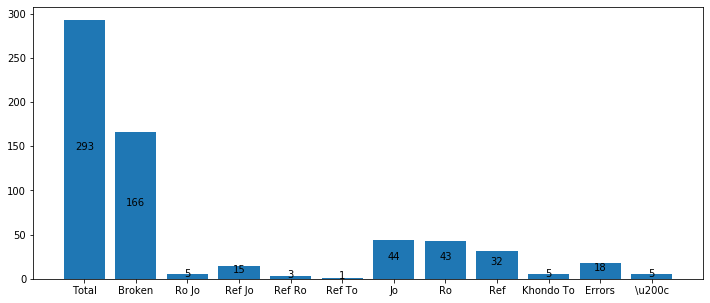

In [5]:
def test_grapheme_extract(list_of_char, adjust=0):
    unmatched = []
    broken_down = []

    for i in jukto_list:

        graphemes = extract_graphemes(i)

        if len(graphemes) > 1:
            broken_down.append((i, graphemes))

        reconstructed = ''.join([str(i) for i in graphemes])

        if i != reconstructed:
            unmatched.append(i)

    print("Number of unmatched characters: {}".format(len(unmatched)))
    print(unmatched)

    print("Number of compound characters that were broken: {}".format(len(broken_down)))
    #print(broken_down)

    broken_rojo = []
    broken_refjo = []
    broken_refro = []
    broken_refto = []
    broken_jo = []
    broken_ro = []
    broken_ref = []
    broken_kto = []
    errors = []

    for i in broken_down:
        if '্র' in i[-1] and '্য' in i[-1] and len(i[-1]) == 3:
            broken_rojo.append(i)
        elif 'র্' in i[-1] and '্য' in i[-1] and len(i[-1]) == 3+adjust:
            broken_refjo.append(i)
        elif 'র্' in i[-1] and '্র' in i[-1] and len(i[-1]) == 3+adjust:
            broken_refro.append(i)
        elif 'র্' in i[-1] and 'ৎ' in i[-1] and len(i[-1]) == 3+adjust:
            broken_refto.append(i)
        elif '্য' in i[-1] and len(i[-1]) == 2:
            broken_jo.append(i)
        elif '্র' in i[-1] and len(i[-1]) == 2:
            broken_ro.append(i)
        elif 'র্' in i[-1] and len(i[-1]) == 2+adjust:
            broken_ref.append(i)
        elif 'ৎ' in i[-1] and len(i[-1]) == 2:
            broken_kto.append(i)
        else:
            errors.append(i)

    print("Number of compound characters with \'্র\' and \'্য\': {}".format(len(broken_rojo)))
    #print(broken_rojo)  

    print("Number of compound characters with \'র্\' and \'্য\': {}".format(len(broken_refjo)))
    #print(broken_refjo)  

    print("Number of compound characters with \'র্\' and \'্র\': {}".format(len(broken_refro)))
    #print(broken_refjo)  

    print("Number of compound characters with \'র্\' and \'ৎ\': {}".format(len(broken_refto)))
    #print(broken_refjo)  

    print("Number of compound characters with \'্য\': {}".format(len(broken_jo)))
    print(broken_jo)

    print("Number of compound characters with \'্র\': {}".format(len(broken_ro)))
    #print(broken_ro)

    print("Number of compound characters with \'র্\': {}".format(len(broken_ref)))
    print(broken_ref)

    print("Number of compound characters with \'ৎ\': {}".format(len(broken_kto)))
    #print(broken_ref)

    print("Number of errors: {}".format(len(errors)))
    print(errors)

    # function to add value labels
    def addlabels(labels, data):
        for i in range(len(labels)):
            plt.text(i, data[i]//2, data[i], ha = 'center')

    data = [len(jukto_list), len(broken_down), len(broken_rojo), 
            len(broken_refjo), len(broken_refro), len(broken_refto),
            len(broken_jo), len(broken_ro), len(broken_ref), 
            len(broken_kto), len(errors), len(unmatched)]
    labels = ['Total', 'Broken', 'Ro Jo', 'Ref Jo', 'Ref Ro', 'Ref To', 
              'Jo', 'Ro', 'Ref', 'Khondo To', 'Errors', r'\u200c']
    #define plot size
    plt.figure(figsize=(12,5))
    plt.bar(labels, data)
    addlabels(labels, data)
    plt.show()
    
    
test_grapheme_extract(jukto_list, 1)

In [6]:
########################Version 4#################################################################
def extract_graphemes(word):
    support_chars = ['্', 'ং', 'ঃ', 'ঁ', 'ি', 'ু', 'ূ', 'ৃ', 'ে', 'ো', 'ৌ' ,'ী', 'া', 'ে', 'ৈ']
    ref_chars = [ '্য', '্র', 'র্', 'য', 'র']
    punck = ['.', ',', '-', '(', ')', '[', ']', '{', '}', '-', '"', '\'', '।', ':','—']
    unicode_garbage = ['\x02', '\x03', '\x06', '\x08', '\x10', '\x12', '&', '¡',
                        '¤', '¥', '¦', '©', '¬', '\xad', '®', '¯', 'Ä', 'Í', 'ä', 'æ', 'è', 'ø', 'ÿ',
                        'œ', 'š', 'Ÿ', 'ƒ', 'β', '॥', '\u09e4', '\u200b', '\u200d', '\u200f', '\uf020',
                        '\uf02d', '�', '\u200b', '\u200c', '\u09e5']
    
    chars = []
    i = 0
    prev_ref = False

    while(i < len(word)):
        if word[i] != '্' and word[i] not in unicode_garbage:
            # print(word[i])
            if i+1 < len(word):
                if word[i+1] == '়':
                    if word[i+2] == '্':
                        chars.append(word[i:i+3])
                        i += 3
                    else:
                        chars.append(word[i:i+2])
                        i += 2
                elif word[i+1] != '্':
                    if word[i+1] == 'র' and i+2 < len(word):
                        if word[i+2] == '্':
                            chars.append(word[i])
                            chars.append('র্')
                            i += 2
                            prev_ref = True
                        else:
                            chars.append(word[i])
                            i += 1
                    else:
                        chars.append(word[i])
                        i += 1
                elif word[i+1] == '্' and word[i] not in support_chars[0:]:
                    # print(word[i])
                    previous = False
                    isSupport = True
                    idx = i+1
                    if idx<len(word):
                        while(isSupport):
                            if idx<len(word):
                                # print(word[i], word[idx], i, idx)
                                if (word[idx] == '্' or word[idx] == 'র') and idx+1 < len(word):
                                    if word[idx] == '্' and word[idx-1] == 'র':
                                        if not previous:
                                            # print(word[idx])
                                            #if i != idx:
                                            #    chars.append(word[i:idx])
                                            chars.append('র্')
                                            # print(chars)
                                            idx += 1
                                            i = idx
                                            # print(chars)
                                            continue
                                    # print(chars)
                                    if word[idx] == 'র':
                                        if word[idx+1] != '্':
                                            # print(word[idx])
                                            # print(word[idx+1])
                                            chars.append('র')
                                        
                                        # print(chars)
                                        idx += 1
                                        i = idx
                                        continue
                                    if word[idx+1] == 'য':
                                        if i != idx:
                                            chars.append(word[i:idx])
                                        chars.append('্য')
                                        idx += 2
                                        i = idx
                                        # print(i)
                                        # print(idx)
                                        continue
                                    if word[idx+1] == 'র':
                                        # print(chars)
                                        if i != idx:
                                            chars.append(word[i:idx])
                                        chars.append('্র')
                                        idx += 2
                                        i = idx
                                        previous = True
                                        continue
                                    if word[idx+1] == '\u200c':
                                        if i != idx:
                                            chars.append(word[i:idx])
                                        i = idx+2
                                        isSupport = False
                                    if word[idx+1] not in support_chars and word[idx+1] not in ref_chars and word[idx+1] not in punck:
                                        if idx+2 < len(word) and word[idx+2] == '্':
                                            idx+=2
                                            continue                                                
                                        else:
                                            chars.append(word[i:idx+2])
                                            idx+=2
                                            i=idx
                                            continue
                                    elif word[idx+1] in punck:
                                        chars.append(word[i:idx+1])
                                        chars.append(word[idx+1])
                                        idx+=2
                                        i=idx
                                        continue
                                    
                                    idx += 2
                                else:
                                    isSupport= False
                            else:
                                isSupport = False
                    if i != idx:
                        chars.append(word[i:idx])
                    i = idx
                else:
                    if word[i] in support_chars[0:]:
                        chars.append(word[i])
                    i += 2
            else:
                chars.append(word[i])
                i += 1
        else:
            if word[i]== '্':
                if prev_ref:
                    prev_ref = False
                    i += 1
                    continue
                chars.append(word[i])
                i+=1
                continue
            else:
                i+=1
                continue
        
    return chars

Number of unmatched characters: 5
['গ্\u200cণ', 'ঙ্\u200cক্ত', 'ল্\u200cফ', 'শ্ল্\u200cভ', 'স্প্\u200cল']
Number of compound characters that were broken: 155
Number of compound characters with '্র' and '্য': 5
Number of compound characters with 'র্' and '্য': 15
Number of compound characters with 'র্' and '্র': 3
Number of compound characters with 'র্' and 'ৎ': 1
Number of compound characters with '্য': 45
[('ক্য', ['ক', '্য']), ('ক্ষ্ম্য', ['ক্ষ্ম', '্য']), ('ক্ষ্য', ['ক্ষ', '্য']), ('খ্য', ['খ', '্য']), ('গ্ধ্য', ['গ্ধ', '্য']), ('গ্ন্য', ['গ্ন', '্য']), ('গ্য', ['গ', '্য']), ('ঘ্য', ['ঘ', '্য']), ('ঙ্ক্য', ['ঙ্ক', '্য']), ('ঙ্খ্য', ['ঙ্খ', '্য']), ('ঙ্গ্য', ['ঙ্গ', '্য']), ('ঙ্ঘ্য', ['ঙ্ঘ', '্য']), ('চ্য', ['চ', '্য']), ('জ্য', ['জ', '্য']), ('ট্য', ['ট', '্য']), ('ড্য', ['ড', '্য']), ('ঢ্য', ['ঢ', '্য']), ('ণ্ঠ্য', ['ণ্ঠ', '্য']), ('ণ্ড্য', ['ণ্ড', '্য']), ('ণ্য', ['ণ', '্য']), ('ত্ত্য', ['ত্ত', '্য']), ('ত্ম্য', ['ত্ম', '্য']), ('ত্য', ['ত', '্য']), ('থ্য', ['থ', '্য']), ('দ্য', [

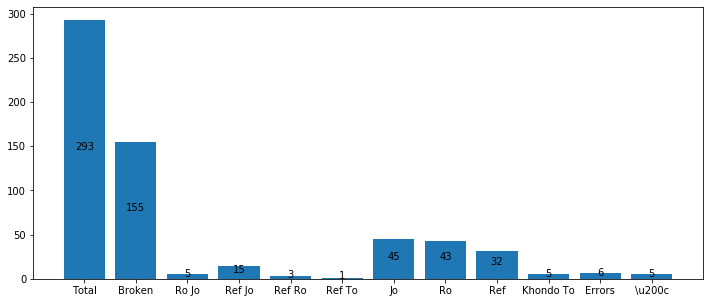

In [7]:
test_grapheme_extract(jukto_list)

In [8]:
def extract_graphemes(word):
    
    return list(word)

extract_graphemes("গ্‌ণ")

['গ', '্', '\u200c', 'ণ']

In [38]:
consonants = "ক খ গ ঘ ঙ চ ছ জ ঝ ঞ ট ঠ ড ঢ ণ ত থ দ ধ ন প ফ ব ভ ম য র ল শ ষ স হ ড় ঢ় য়"
consonants = consonants.split()
print(len(consonants))
print(consonants)

35
['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়']


In [39]:
consonant_clusters = {}

length = len(consonants)

for i in range(0, length):
    consonant_clusters[consonants[i]] = []
    for j in range(0, length):
        consonant_clusters[consonants[i]].append(consonants[i] + '্' + consonants[j])

In [40]:
print(consonant_clusters)

{'ক': ['ক্ক', 'ক্খ', 'ক্গ', 'ক্ঘ', 'ক্ঙ', 'ক্চ', 'ক্ছ', 'ক্জ', 'ক্ঝ', 'ক্ঞ', 'ক্ট', 'ক্ঠ', 'ক্ড', 'ক্ঢ', 'ক্ণ', 'ক্ত', 'ক্থ', 'ক্দ', 'ক্ধ', 'ক্ন', 'ক্প', 'ক্ফ', 'ক্ব', 'ক্ভ', 'ক্ম', 'ক্য', 'ক্র', 'ক্ল', 'ক্শ', 'ক্ষ', 'ক্স', 'ক্হ', 'ক্ড়', 'ক্ঢ়', 'ক্য়'], 'খ': ['খ্ক', 'খ্খ', 'খ্গ', 'খ্ঘ', 'খ্ঙ', 'খ্চ', 'খ্ছ', 'খ্জ', 'খ্ঝ', 'খ্ঞ', 'খ্ট', 'খ্ঠ', 'খ্ড', 'খ্ঢ', 'খ্ণ', 'খ্ত', 'খ্থ', 'খ্দ', 'খ্ধ', 'খ্ন', 'খ্প', 'খ্ফ', 'খ্ব', 'খ্ভ', 'খ্ম', 'খ্য', 'খ্র', 'খ্ল', 'খ্শ', 'খ্ষ', 'খ্স', 'খ্হ', 'খ্ড়', 'খ্ঢ়', 'খ্য়'], 'গ': ['গ্ক', 'গ্খ', 'গ্গ', 'গ্ঘ', 'গ্ঙ', 'গ্চ', 'গ্ছ', 'গ্জ', 'গ্ঝ', 'গ্ঞ', 'গ্ট', 'গ্ঠ', 'গ্ড', 'গ্ঢ', 'গ্ণ', 'গ্ত', 'গ্থ', 'গ্দ', 'গ্ধ', 'গ্ন', 'গ্প', 'গ্ফ', 'গ্ব', 'গ্ভ', 'গ্ম', 'গ্য', 'গ্র', 'গ্ল', 'গ্শ', 'গ্ষ', 'গ্স', 'গ্হ', 'গ্ড়', 'গ্ঢ়', 'গ্য়'], 'ঘ': ['ঘ্ক', 'ঘ্খ', 'ঘ্গ', 'ঘ্ঘ', 'ঘ্ঙ', 'ঘ্চ', 'ঘ্ছ', 'ঘ্জ', 'ঘ্ঝ', 'ঘ্ঞ', 'ঘ্ট', 'ঘ্ঠ', 'ঘ্ড', 'ঘ্ঢ', 'ঘ্ণ', 'ঘ্ত', 'ঘ্থ', 'ঘ্দ', 'ঘ্ধ', 'ঘ্ন', 'ঘ্প', 'ঘ্ফ', 'ঘ্ব', 'ঘ্ভ', 'ঘ্ম', 'ঘ্য', 'ঘ্র', 'ঘ্ল', 'ঘ্শ', 'ঘ্ষ', 'ঘ্স', 'ঘ্হ', 'ঘ্ড

In [ ]:
{'ক': ['ক্ক', 'ক্খ', 'ক্গ', 'ক্ঘ', 'ক্ঙ', 'ক্চ', 'ক্ছ', 'ক্জ', 'ক্ঝ', 'ক্ঞ', 'ক্ট', 'ক্ঠ', 'ক্ড', 'ক্ঢ', 'ক্ণ', 'ক্ত', 'ক্থ', 'ক্দ', 'ক্ধ', 'ক্ন', 'ক্প', 'ক্ফ', 'ক্ব', 'ক্ভ', 'ক্ম', 'ক্য', 'ক্র', 'ক্ল', 'ক্শ', 'ক্ষ', 'ক্স', 'ক্হ', 'ক্ড়', 'ক্ঢ়', 'ক্য়'],
 'খ': ['খ্ক', 'খ্খ', 'খ্গ', 'খ্ঘ', 'খ্ঙ', 'খ্চ', 'খ্ছ', 'খ্জ', 'খ্ঝ', 'খ্ঞ', 'খ্ট', 'খ্ঠ', 'খ্ড', 'খ্ঢ', 'খ্ণ', 'খ্ত', 'খ্থ', 'খ্দ', 'খ্ধ', 'খ্ন', 'খ্প', 'খ্ফ', 'খ্ব', 'খ্ভ', 'খ্ম', 'খ্য', 'খ্র', 'খ্ল', 'খ্শ', 'খ্ষ', 'খ্স', 'খ্হ', 'খ্ড়', 'খ্ঢ়', 'খ্য়'],
 'গ': ['গ্ক', 'গ্খ', 'গ্গ', 'গ্ঘ', 'গ্ঙ', 'গ্চ', 'গ্ছ', 'গ্জ', 'গ্ঝ', 'গ্ঞ', 'গ্ট', 'গ্ঠ', 'গ্ড', 'গ্ঢ', 'গ্ণ', 'গ্ত', 'গ্থ', 'গ্দ', 'গ্ধ', 'গ্ন', 'গ্প', 'গ্ফ', 'গ্ব', 'গ্ভ', 'গ্ম', 'গ্য', 'গ্র', 'গ্ল', 'গ্শ', 'গ্ষ', 'গ্স', 'গ্হ', 'গ্ড়', 'গ্ঢ়', 'গ্য়'],
 'ঘ': ['ঘ্ক', 'ঘ্খ', 'ঘ্গ', 'ঘ্ঘ', 'ঘ্ঙ', 'ঘ্চ', 'ঘ্ছ', 'ঘ্জ', 'ঘ্ঝ', 'ঘ্ঞ', 'ঘ্ট', 'ঘ্ঠ', 'ঘ্ড', 'ঘ্ঢ', 'ঘ্ণ', 'ঘ্ত', 'ঘ্থ', 'ঘ্দ', 'ঘ্ধ', 'ঘ্ন', 'ঘ্প', 'ঘ্ফ', 'ঘ্ব', 'ঘ্ভ', 'ঘ্ম', 'ঘ্য', 'ঘ্র', 'ঘ্ল', 'ঘ্শ', 'ঘ্ষ', 'ঘ্স', 'ঘ্হ', 'ঘ্ড়', 'ঘ্ঢ়', 'ঘ্য়'],
 'ঙ': ['ঙ্ক', 'ঙ্খ', 'ঙ্গ', 'ঙ্ঘ', 'ঙ্ঙ', 'ঙ্চ', 'ঙ্ছ', 'ঙ্জ', 'ঙ্ঝ', 'ঙ্ঞ', 'ঙ্ট', 'ঙ্ঠ', 'ঙ্ড', 'ঙ্ঢ', 'ঙ্ণ', 'ঙ্ত', 'ঙ্থ', 'ঙ্দ', 'ঙ্ধ', 'ঙ্ন', 'ঙ্প', 'ঙ্ফ', 'ঙ্ব', 'ঙ্ভ', 'ঙ্ম', 'ঙ্য', 'ঙ্র', 'ঙ্ল', 'ঙ্শ', 'ঙ্ষ', 'ঙ্স', 'ঙ্হ', 'ঙ্ড়', 'ঙ্ঢ়', 'ঙ্য়'],
 'চ': ['চ্ক', 'চ্খ', 'চ্গ', 'চ্ঘ', 'চ্ঙ', 'চ্চ', 'চ্ছ', 'চ্জ', 'চ্ঝ', 'চ্ঞ', 'চ্ট', 'চ্ঠ', 'চ্ড', 'চ্ঢ', 'চ্ণ', 'চ্ত', 'চ্থ', 'চ্দ', 'চ্ধ', 'চ্ন', 'চ্প', 'চ্ফ', 'চ্ব', 'চ্ভ', 'চ্ম', 'চ্য', 'চ্র', 'চ্ল', 'চ্শ', 'চ্ষ', 'চ্স', 'চ্হ', 'চ্ড়', 'চ্ঢ়', 'চ্য়'],
 'ছ': ['ছ্ক', 'ছ্খ', 'ছ্গ', 'ছ্ঘ', 'ছ্ঙ', 'ছ্চ', 'ছ্ছ', 'ছ্জ', 'ছ্ঝ', 'ছ্ঞ', 'ছ্ট', 'ছ্ঠ', 'ছ্ড', 'ছ্ঢ', 'ছ্ণ', 'ছ্ত', 'ছ্থ', 'ছ্দ', 'ছ্ধ', 'ছ্ন', 'ছ্প', 'ছ্ফ', 'ছ্ব', 'ছ্ভ', 'ছ্ম', 'ছ্য', 'ছ্র', 'ছ্ল', 'ছ্শ', 'ছ্ষ', 'ছ্স', 'ছ্হ', 'ছ্ড়', 'ছ্ঢ়', 'ছ্য়'],
 'জ': ['জ্ক', 'জ্খ', 'জ্গ', 'জ্ঘ', 'জ্ঙ', 'জ্চ', 'জ্ছ', 'জ্জ', 'জ্ঝ', 'জ্ঞ', 'জ্ট', 'জ্ঠ', 'জ্ড', 'জ্ঢ', 'জ্ণ', 'জ্ত', 'জ্থ', 'জ্দ', 'জ্ধ', 'জ্ন', 'জ্প', 'জ্ফ', 'জ্ব', 'জ্ভ', 'জ্ম', 'জ্য', 'জ্র', 'জ্ল', 'জ্শ', 'জ্ষ', 'জ্স', 'জ্হ', 'জ্ড়', 'জ্ঢ়', 'জ্য়'],
 'ঝ': ['ঝ্ক', 'ঝ্খ', 'ঝ্গ', 'ঝ্ঘ', 'ঝ্ঙ', 'ঝ্চ', 'ঝ্ছ', 'ঝ্জ', 'ঝ্ঝ', 'ঝ্ঞ', 'ঝ্ট', 'ঝ্ঠ', 'ঝ্ড', 'ঝ্ঢ', 'ঝ্ণ', 'ঝ্ত', 'ঝ্থ', 'ঝ্দ', 'ঝ্ধ', 'ঝ্ন', 'ঝ্প', 'ঝ্ফ', 'ঝ্ব', 'ঝ্ভ', 'ঝ্ম', 'ঝ্য', 'ঝ্র', 'ঝ্ল', 'ঝ্শ', 'ঝ্ষ', 'ঝ্স', 'ঝ্হ', 'ঝ্ড়', 'ঝ্ঢ়', 'ঝ্য়'],
 'ঞ': ['ঞ্ক', 'ঞ্খ', 'ঞ্গ', 'ঞ্ঘ', 'ঞ্ঙ', 'ঞ্চ', 'ঞ্ছ', 'ঞ্জ', 'ঞ্ঝ', 'ঞ্ঞ', 'ঞ্ট', 'ঞ্ঠ', 'ঞ্ড', 'ঞ্ঢ', 'ঞ্ণ', 'ঞ্ত', 'ঞ্থ', 'ঞ্দ', 'ঞ্ধ', 'ঞ্ন', 'ঞ্প', 'ঞ্ফ', 'ঞ্ব', 'ঞ্ভ', 'ঞ্ম', 'ঞ্য', 'ঞ্র', 'ঞ্ল', 'ঞ্শ', 'ঞ্ষ', 'ঞ্স', 'ঞ্হ', 'ঞ্ড়', 'ঞ্ঢ়', 'ঞ্য়'],
 'ট': ['ট্ক', 'ট্খ', 'ট্গ', 'ট্ঘ', 'ট্ঙ', 'ট্চ', 'ট্ছ', 'ট্জ', 'ট্ঝ', 'ট্ঞ', 'ট্ট', 'ট্ঠ', 'ট্ড', 'ট্ঢ', 'ট্ণ', 'ট্ত', 'ট্থ', 'ট্দ', 'ট্ধ', 'ট্ন', 'ট্প', 'ট্ফ', 'ট্ব', 'ট্ভ', 'ট্ম', 'ট্য', 'ট্র', 'ট্ল', 'ট্শ', 'ট্ষ', 'ট্স', 'ট্হ', 'ট্ড়', 'ট্ঢ়', 'ট্য়'],
 'ঠ': ['ঠ্ক', 'ঠ্খ', 'ঠ্গ', 'ঠ্ঘ', 'ঠ্ঙ', 'ঠ্চ', 'ঠ্ছ', 'ঠ্জ', 'ঠ্ঝ', 'ঠ্ঞ', 'ঠ্ট', 'ঠ্ঠ', 'ঠ্ড', 'ঠ্ঢ', 'ঠ্ণ', 'ঠ্ত', 'ঠ্থ', 'ঠ্দ', 'ঠ্ধ', 'ঠ্ন', 'ঠ্প', 'ঠ্ফ', 'ঠ্ব', 'ঠ্ভ', 'ঠ্ম', 'ঠ্য', 'ঠ্র', 'ঠ্ল', 'ঠ্শ', 'ঠ্ষ', 'ঠ্স', 'ঠ্হ', 'ঠ্ড়', 'ঠ্ঢ়', 'ঠ্য়'],
 'ড': ['ড্ক', 'ড্খ', 'ড্গ', 'ড্ঘ', 'ড্ঙ', 'ড্চ', 'ড্ছ', 'ড্জ', 'ড্ঝ', 'ড্ঞ', 'ড্ট', 'ড্ঠ', 'ড্ড', 'ড্ঢ', 'ড্ণ', 'ড্ত', 'ড্থ', 'ড্দ', 'ড্ধ', 'ড্ন', 'ড্প', 'ড্ফ', 'ড্ব', 'ড্ভ', 'ড্ম', 'ড্য', 'ড্র', 'ড্ল', 'ড্শ', 'ড্ষ', 'ড্স', 'ড্হ', 'ড্ড়', 'ড্ঢ়', 'ড্য়'],
 'ঢ': ['ঢ্ক', 'ঢ্খ', 'ঢ্গ', 'ঢ্ঘ', 'ঢ্ঙ', 'ঢ্চ', 'ঢ্ছ', 'ঢ্জ', 'ঢ্ঝ', 'ঢ্ঞ', 'ঢ্ট', 'ঢ্ঠ', 'ঢ্ড', 'ঢ্ঢ', 'ঢ্ণ', 'ঢ্ত', 'ঢ্থ', 'ঢ্দ', 'ঢ্ধ', 'ঢ্ন', 'ঢ্প', 'ঢ্ফ', 'ঢ্ব', 'ঢ্ভ', 'ঢ্ম', 'ঢ্য', 'ঢ্র', 'ঢ্ল', 'ঢ্শ', 'ঢ্ষ', 'ঢ্স', 'ঢ্হ', 'ঢ্ড়', 'ঢ্ঢ়', 'ঢ্য়'],
 'ণ': ['ণ্ক', 'ণ্খ', 'ণ্গ', 'ণ্ঘ', 'ণ্ঙ', 'ণ্চ', 'ণ্ছ', 'ণ্জ', 'ণ্ঝ', 'ণ্ঞ', 'ণ্ট', 'ণ্ঠ', 'ণ্ড', 'ণ্ঢ', 'ণ্ণ', 'ণ্ত', 'ণ্থ', 'ণ্দ', 'ণ্ধ', 'ণ্ন', 'ণ্প', 'ণ্ফ', 'ণ্ব', 'ণ্ভ', 'ণ্ম', 'ণ্য', 'ণ্র', 'ণ্ল', 'ণ্শ', 'ণ্ষ', 'ণ্স', 'ণ্হ', 'ণ্ড়', 'ণ্ঢ়', 'ণ্য়'],
 'ত': ['ত্ক', 'ত্খ', 'ত্গ', 'ত্ঘ', 'ত্ঙ', 'ত্চ', 'ত্ছ', 'ত্জ', 'ত্ঝ', 'ত্ঞ', 'ত্ট', 'ত্ঠ', 'ত্ড', 'ত্ঢ', 'ত্ণ', 'ত্ত', 'ত্থ', 'ত্দ', 'ত্ধ', 'ত্ন', 'ত্প', 'ত্ফ', 'ত্ব', 'ত্ভ', 'ত্ম', 'ত্য', 'ত্র', 'ত্ল', 'ত্শ', 'ত্ষ', 'ত্স', 'ত্হ', 'ত্ড়', 'ত্ঢ়', 'ত্য়'],
 'থ': ['থ্ক', 'থ্খ', 'থ্গ', 'থ্ঘ', 'থ্ঙ', 'থ্চ', 'থ্ছ', 'থ্জ', 'থ্ঝ', 'থ্ঞ', 'থ্ট', 'থ্ঠ', 'থ্ড', 'থ্ঢ', 'থ্ণ', 'থ্ত', 'থ্থ', 'থ্দ', 'থ্ধ', 'থ্ন', 'থ্প', 'থ্ফ', 'থ্ব', 'থ্ভ', 'থ্ম', 'থ্য', 'থ্র', 'থ্ল', 'থ্শ', 'থ্ষ', 'থ্স', 'থ্হ', 'থ্ড়', 'থ্ঢ়', 'থ্য়'],
 'দ': ['দ্ক', 'দ্খ', 'দ্গ', 'দ্ঘ', 'দ্ঙ', 'দ্চ', 'দ্ছ', 'দ্জ', 'দ্ঝ', 'দ্ঞ', 'দ্ট', 'দ্ঠ', 'দ্ড', 'দ্ঢ', 'দ্ণ', 'দ্ত', 'দ্থ', 'দ্দ', 'দ্ধ', 'দ্ন', 'দ্প', 'দ্ফ', 'দ্ব', 'দ্ভ', 'দ্ম', 'দ্য', 'দ্র', 'দ্ল', 'দ্শ', 'দ্ষ', 'দ্স', 'দ্হ', 'দ্ড়', 'দ্ঢ়', 'দ্য়'],
 'ধ': ['ধ্ক', 'ধ্খ', 'ধ্গ', 'ধ্ঘ', 'ধ্ঙ', 'ধ্চ', 'ধ্ছ', 'ধ্জ', 'ধ্ঝ', 'ধ্ঞ', 'ধ্ট', 'ধ্ঠ', 'ধ্ড', 'ধ্ঢ', 'ধ্ণ', 'ধ্ত', 'ধ্থ', 'ধ্দ', 'ধ্ধ', 'ধ্ন', 'ধ্প', 'ধ্ফ', 'ধ্ব', 'ধ্ভ', 'ধ্ম', 'ধ্য', 'ধ্র', 'ধ্ল', 'ধ্শ', 'ধ্ষ', 'ধ্স', 'ধ্হ', 'ধ্ড়', 'ধ্ঢ়', 'ধ্য়'],
 'ন': ['ন্ক', 'ন্খ', 'ন্গ', 'ন্ঘ', 'ন্ঙ', 'ন্চ', 'ন্ছ', 'ন্জ', 'ন্ঝ', 'ন্ঞ', 'ন্ট', 'ন্ঠ', 'ন্ড', 'ন্ঢ', 'ন্ণ', 'ন্ত', 'ন্থ', 'ন্দ', 'ন্ধ', 'ন্ন', 'ন্প', 'ন্ফ', 'ন্ব', 'ন্ভ', 'ন্ম', 'ন্য', 'ন্র', 'ন্ল', 'ন্শ', 'ন্ষ', 'ন্স', 'ন্হ', 'ন্ড়', 'ন্ঢ়', 'ন্য়'],
 'প': ['প্ক', 'প্খ', 'প্গ', 'প্ঘ', 'প্ঙ', 'প্চ', 'প্ছ', 'প্জ', 'প্ঝ', 'প্ঞ', 'প্ট', 'প্ঠ', 'প্ড', 'প্ঢ', 'প্ণ', 'প্ত', 'প্থ', 'প্দ', 'প্ধ', 'প্ন', 'প্প', 'প্ফ', 'প্ব', 'প্ভ', 'প্ম', 'প্য', 'প্র', 'প্ল', 'প্শ', 'প্ষ', 'প্স', 'প্হ', 'প্ড়', 'প্ঢ়', 'প্য়'],
 'ফ': ['ফ্ক', 'ফ্খ', 'ফ্গ', 'ফ্ঘ', 'ফ্ঙ', 'ফ্চ', 'ফ্ছ', 'ফ্জ', 'ফ্ঝ', 'ফ্ঞ', 'ফ্ট', 'ফ্ঠ', 'ফ্ড', 'ফ্ঢ', 'ফ্ণ', 'ফ্ত', 'ফ্থ', 'ফ্দ', 'ফ্ধ', 'ফ্ন', 'ফ্প', 'ফ্ফ', 'ফ্ব', 'ফ্ভ', 'ফ্ম', 'ফ্য', 'ফ্র', 'ফ্ল', 'ফ্শ', 'ফ্ষ', 'ফ্স', 'ফ্হ', 'ফ্ড়', 'ফ্ঢ়', 'ফ্য়'],
 'ব': ['ব্ক', 'ব্খ', 'ব্গ', 'ব্ঘ', 'ব্ঙ', 'ব্চ', 'ব্ছ', 'ব্জ', 'ব্ঝ', 'ব্ঞ', 'ব্ট', 'ব্ঠ', 'ব্ড', 'ব্ঢ', 'ব্ণ', 'ব্ত', 'ব্থ', 'ব্দ', 'ব্ধ', 'ব্ন', 'ব্প', 'ব্ফ', 'ব্ব', 'ব্ভ', 'ব্ম', 'ব্য', 'ব্র', 'ব্ল', 'ব্শ', 'ব্ষ', 'ব্স', 'ব্হ', 'ব্ড়', 'ব্ঢ়', 'ব্য়'],
 'ভ': ['ভ্ক', 'ভ্খ', 'ভ্গ', 'ভ্ঘ', 'ভ্ঙ', 'ভ্চ', 'ভ্ছ', 'ভ্জ', 'ভ্ঝ', 'ভ্ঞ', 'ভ্ট', 'ভ্ঠ', 'ভ্ড', 'ভ্ঢ', 'ভ্ণ', 'ভ্ত', 'ভ্থ', 'ভ্দ', 'ভ্ধ', 'ভ্ন', 'ভ্প', 'ভ্ফ', 'ভ্ব', 'ভ্ভ', 'ভ্ম', 'ভ্য', 'ভ্র', 'ভ্ল', 'ভ্শ', 'ভ্ষ', 'ভ্স', 'ভ্হ', 'ভ্ড়', 'ভ্ঢ়', 'ভ্য়'],
 'ম': ['ম্ক', 'ম্খ', 'ম্গ', 'ম্ঘ', 'ম্ঙ', 'ম্চ', 'ম্ছ', 'ম্জ', 'ম্ঝ', 'ম্ঞ', 'ম্ট', 'ম্ঠ', 'ম্ড', 'ম্ঢ', 'ম্ণ', 'ম্ত', 'ম্থ', 'ম্দ', 'ম্ধ', 'ম্ন', 'ম্প', 'ম্ফ', 'ম্ব', 'ম্ভ', 'ম্ম', 'ম্য', 'ম্র', 'ম্ল', 'ম্শ', 'ম্ষ', 'ম্স', 'ম্হ', 'ম্ড়', 'ম্ঢ়', 'ম্য়'],
 'য': ['য্ক', 'য্খ', 'য্গ', 'য্ঘ', 'য্ঙ', 'য্চ', 'য্ছ', 'য্জ', 'য্ঝ', 'য্ঞ', 'য্ট', 'য্ঠ', 'য্ড', 'য্ঢ', 'য্ণ', 'য্ত', 'য্থ', 'য্দ', 'য্ধ', 'য্ন', 'য্প', 'য্ফ', 'য্ব', 'য্ভ', 'য্ম', 'য্য', 'য্র', 'য্ল', 'য্শ', 'য্ষ', 'য্স', 'য্হ', 'য্ড়', 'য্ঢ়', 'য্য়'],
 'র': ['র্ক', 'র্খ', 'র্গ', 'র্ঘ', 'র্ঙ', 'র্চ', 'র্ছ', 'র্জ', 'র্ঝ', 'র্ঞ', 'র্ট', 'র্ঠ', 'র্ড', 'র্ঢ', 'র্ণ', 'র্ত', 'র্থ', 'র্দ', 'র্ধ', 'র্ন', 'র্প', 'র্ফ', 'র্ব', 'র্ভ', 'র্ম', 'র্য', 'র্র', 'র্ল', 'র্শ', 'র্ষ', 'র্স', 'র্হ', 'র্ড়', 'র্ঢ়', 'র্য়'],
 'ল': ['ল্ক', 'ল্খ', 'ল্গ', 'ল্ঘ', 'ল্ঙ', 'ল্চ', 'ল্ছ', 'ল্জ', 'ল্ঝ', 'ল্ঞ', 'ল্ট', 'ল্ঠ', 'ল্ড', 'ল্ঢ', 'ল্ণ', 'ল্ত', 'ল্থ', 'ল্দ', 'ল্ধ', 'ল্ন', 'ল্প', 'ল্ফ', 'ল্ব', 'ল্ভ', 'ল্ম', 'ল্য', 'ল্র', 'ল্ল', 'ল্শ', 'ল্ষ', 'ল্স', 'ল্হ', 'ল্ড়', 'ল্ঢ়', 'ল্য়'],
 'শ': ['শ্ক', 'শ্খ', 'শ্গ', 'শ্ঘ', 'শ্ঙ', 'শ্চ', 'শ্ছ', 'শ্জ', 'শ্ঝ', 'শ্ঞ', 'শ্ট', 'শ্ঠ', 'শ্ড', 'শ্ঢ', 'শ্ণ', 'শ্ত', 'শ্থ', 'শ্দ', 'শ্ধ', 'শ্ন', 'শ্প', 'শ্ফ', 'শ্ব', 'শ্ভ', 'শ্ম', 'শ্য', 'শ্র', 'শ্ল', 'শ্শ', 'শ্ষ', 'শ্স', 'শ্হ', 'শ্ড়', 'শ্ঢ়', 'শ্য়'],
 'ষ': ['ষ্ক', 'ষ্খ', 'ষ্গ', 'ষ্ঘ', 'ষ্ঙ', 'ষ্চ', 'ষ্ছ', 'ষ্জ', 'ষ্ঝ', 'ষ্ঞ', 'ষ্ট', 'ষ্ঠ', 'ষ্ড', 'ষ্ঢ', 'ষ্ণ', 'ষ্ত', 'ষ্থ', 'ষ্দ', 'ষ্ধ', 'ষ্ন', 'ষ্প', 'ষ্ফ', 'ষ্ব', 'ষ্ভ', 'ষ্ম', 'ষ্য', 'ষ্র', 'ষ্ল', 'ষ্শ', 'ষ্ষ', 'ষ্স', 'ষ্হ', 'ষ্ড়', 'ষ্ঢ়', 'ষ্য়'],
 'স': ['স্ক', 'স্খ', 'স্গ', 'স্ঘ', 'স্ঙ', 'স্চ', 'স্ছ', 'স্জ', 'স্ঝ', 'স্ঞ', 'স্ট', 'স্ঠ', 'স্ড', 'স্ঢ', 'স্ণ', 'স্ত', 'স্থ', 'স্দ', 'স্ধ', 'স্ন', 'স্প', 'স্ফ', 'স্ব', 'স্ভ', 'স্ম', 'স্য', 'স্র', 'স্ল', 'স্শ', 'স্ষ', 'স্স', 'স্হ', 'স্ড়', 'স্ঢ়', 'স্য়'],
 'হ': ['হ্ক', 'হ্খ', 'হ্গ', 'হ্ঘ', 'হ্ঙ', 'হ্চ', 'হ্ছ', 'হ্জ', 'হ্ঝ', 'হ্ঞ', 'হ্ট', 'হ্ঠ', 'হ্ড', 'হ্ঢ', 'হ্ণ', 'হ্ত', 'হ্থ', 'হ্দ', 'হ্ধ', 'হ্ন', 'হ্প', 'হ্ফ', 'হ্ব', 'হ্ভ', 'হ্ম', 'হ্য', 'হ্র', 'হ্ল', 'হ্শ', 'হ্ষ', 'হ্স', 'হ্হ', 'হ্ড়', 'হ্ঢ়', 'হ্য়'],
 'ড়': ['ড়্ক', 'ড়্খ', 'ড়্গ', 'ড়্ঘ', 'ড়্ঙ', 'ড়্চ', 'ড়্ছ', 'ড়্জ', 'ড়্ঝ', 'ড়্ঞ', 'ড়্ট', 'ড়্ঠ', 'ড়্ড', 'ড়্ঢ', 'ড়্ণ', 'ড়্ত', 'ড়্থ', 'ড়্দ', 'ড়্ধ', 'ড়্ন', 'ড়্প', 'ড়্ফ', 'ড়্ব', 'ড়্ভ', 'ড়্ম', 'ড়্য', 'ড়্র', 'ড়্ল', 'ড়্শ', 'ড়্ষ', 'ড়্স', 'ড়্হ', 'ড়্ড়', 'ড়্ঢ়', 'ড়্য়'],
 'ঢ়': ['ঢ়্ক', 'ঢ়্খ', 'ঢ়্গ', 'ঢ়্ঘ', 'ঢ়্ঙ', 'ঢ়্চ', 'ঢ়্ছ', 'ঢ়্জ', 'ঢ়্ঝ', 'ঢ়্ঞ', 'ঢ়্ট', 'ঢ়্ঠ', 'ঢ়্ড', 'ঢ়্ঢ', 'ঢ়্ণ', 'ঢ়্ত', 'ঢ়্থ', 'ঢ়্দ', 'ঢ়্ধ', 'ঢ়্ন', 'ঢ়্প', 'ঢ়্ফ', 'ঢ়্ব', 'ঢ়্ভ', 'ঢ়্ম', 'ঢ়্য', 'ঢ়্র', 'ঢ়্ল', 'ঢ়্শ', 'ঢ়্ষ', 'ঢ়্স', 'ঢ়্হ', 'ঢ়্ড়', 'ঢ়্ঢ়', 'ঢ়্য়'],
 'য়': ['য়্ক', 'য়্খ', 'য়্গ', 'য়্ঘ', 'য়্ঙ', 'য়্চ', 'য়্ছ', 'য়্জ', 'য়্ঝ', 'য়্ঞ', 'য়্ট', 'য়্ঠ', 'য়্ড', 'য়্ঢ', 'য়্ণ', 'য়্ত', 'য়্থ', 'য়্দ', 'য়্ধ', 'য়্ন', 'য়্প', 'য়্ফ', 'য়্ব', 'য়্ভ', 'য়্ম', 'য়্য', 'য়্র', 'য়্ল', 'য়্শ', 'য়্ষ', 'য়্স', 'য়্হ', 'য়্ড়', 'য়্ঢ়', 'য়্য়']}

In [41]:
consonant_clusters = {'ক': ['ক্ক', 'ক্ট', 'ক্ত', 'ক্ন', 'ক্ব', 'ক্ম', 'ক্য', 'ক্র', 'ক্ল', 'ক্ষ', 'ক্স'],
                      'খ': ['খ্য', 'খ্র'],
                      'গ': ['গ্গ', 'গ্ধ', 'গ্ন', 'গ্ব', 'গ্ম', 'গ্য', 'গ্র', 'গ্ল'],
                      'ঘ': ['ঘ্ন', 'ঘ্য', 'ঘ্র'],
                      'ঙ': ['ঙ্ক', 'ঙ্খ', 'ঙ্গ', 'ঙ্ঘ', 'ঙ্ম', 'ঙ্য', 'ঙ্র'],
                      'চ': ['চ্চ', 'চ্ছ', 'চ্ঞ', 'চ্য', 'চ্র'],
                      'ছ': ['ছ্য', 'ছ্র'],
                      'জ': ['জ্জ', 'জ্ঝ', 'জ্ঞ', 'জ্ব', 'জ্য', 'জ্র'],
                      'ঝ': ['ঝ্য', 'ঝ্র'],
                      'ঞ': ['ঞ্চ', 'ঞ্ছ', 'ঞ্জ', 'ঞ্ঝ', 'ঞ্য', 'ঞ্র'],
                      'ট': ['ট্ট', 'ট্ব', 'ট্য', 'ট্র'],
                      'ঠ': ['ঠ্য', 'ঠ্র'],
                      'ড': ['ড্ড', 'ড্য', 'ড্র'],
                      'ঢ': ['ঢ্য', 'ঢ্র'],
                      'ণ': ['ণ্ট', 'ণ্ঠ', 'ণ্ড', 'ণ্ঢ', 'ণ্ণ', 'ণ্ব', 'ণ্ম', 'ণ্য', 'ণ্র'],
                      'ত': ['ত্ত', 'ত্থ', 'ত্ন', 'ত্ব', 'ত্ম', 'ত্য', 'ত্র'],
                      'থ': ['থ্ব', 'থ্য', 'থ্র'],
                      'দ': ['দ্গ', 'দ্ঘ', 'দ্দ', 'দ্ধ', 'দ্ব', 'দ্ভ', 'দ্ম', 'দ্য', 'দ্র'],
                      'ধ': ['ধ্ন', 'ধ্ব', 'ধ্য', 'ধ্র'],
                      'ন': ['ন্জ', 'ন্ট', 'ন্ঠ', 'ন্ড', 'ন্ত', 'ন্থ', 'ন্দ', 'ন্ধ', 'ন্ন', 'ন্ব', 'ন্ম', 'ন্য', 'ন্র', 'ন্স'],
                      'প': ['প্ট', 'প্ত', 'প্ন', 'প্প', 'প্ল', 'প্য', 'প্র', 'প্স'],
                      'ফ': ['ফ্ট', 'ফ্য', 'ফ্র', 'ফ্ল'],
                      'ব': ['ব্জ', 'ব্দ', 'ব্ধ', 'ব্ব', 'ব্ভ', 'ব্য', 'ব্র', 'ব্ল'],
                      'ভ': ['ভ্য', 'ভ্র'],
                      'ম': ['ম্ন', 'ম্প', 'ম্ফ', 'ম্ব', 'ম্ভ', 'ম্ম', 'ম্য', 'ম্র', 'ম্ল'],
                      'য': ['য্য', 'য্র'],
                      'র': ['র্ক', 'র্খ', 'র্গ', 'র্ঘ', 'র্ঙ', 'র্চ', 'র্ছ', 'র্জ', 'র্ঝ', 'র্ঞ', 'র্ট', 'র্ঠ', 'র্ড', 'র্ঢ', 'র্ণ', 'র্ত', 'র্থ', 'র্দ',
                            'র্ধ', 'র্ন', 'র্প', 'র্ফ', 'র্ব', 'র্ভ', 'র্ম', 'র্য', 'র্র', 'র্ল', 'র্শ', 'র্ষ', 'র্স', 'র্হ', 'র্ড়', 'র্ঢ়', 'র্য়'],
                      'ল': ['ল্ক', 'ল্গ', 'ল্ট', 'ল্ড', 'ল্প', 'ল্ফ', 'ল্ব', 'ল্ম', 'ল্য', 'ল্র', 'ল্ল', 'ল্স'],
                      'শ': ['শ্চ', 'শ্ছ', 'শ্ত', 'শ্ন', 'শ্ব', 'শ্ম', 'শ্য', 'শ্র', 'শ্ল'],
                      'ষ': ['ষ্ক', 'ষ্ট', 'ষ্ঠ', 'ষ্ণ', 'ষ্প', 'ষ্ফ', 'ষ্ব', 'ষ্ম', 'ষ্য', 'ষ্র'],
                      'স': ['স্ক', 'স্খ', 'স্ট', 'স্ত', 'স্থ', 'স্ন', 'স্প', 'স্ফ', 'স্ব', 'স্ম', 'স্য', 'স্র', 'স্ল'],
                      'হ': ['হ্ণ', 'হ্ন', 'হ্ব', 'হ্ম', 'হ্য', 'হ্র', 'হ্ল'],
                      'ড়': ['ড়্গ', 'ড়্য', 'ড়্র'],
                      'ঢ়': ['ঢ়্য', 'ঢ়্র'],
                      'য়': ['য়্য', 'য়্র']}

print(len(consonant_clusters))
print(consonant_clusters)

forms_cluster = {}

for key, value in consonant_clusters.items():
    forms_with = [x[-1] for x in value]
    forms_cluster[key] = forms_with
    
print(len(forms_cluster))
print(forms_cluster)

35
{'ক': ['ক্ক', 'ক্ট', 'ক্ত', 'ক্ন', 'ক্ব', 'ক্ম', 'ক্য', 'ক্র', 'ক্ল', 'ক্ষ', 'ক্স'], 'খ': ['খ্য', 'খ্র'], 'গ': ['গ্গ', 'গ্ধ', 'গ্ন', 'গ্ব', 'গ্ম', 'গ্য', 'গ্র', 'গ্ল'], 'ঘ': ['ঘ্ন', 'ঘ্য', 'ঘ্র'], 'ঙ': ['ঙ্ক', 'ঙ্খ', 'ঙ্গ', 'ঙ্ঘ', 'ঙ্ম', 'ঙ্য', 'ঙ্র'], 'চ': ['চ্চ', 'চ্ছ', 'চ্ঞ', 'চ্য', 'চ্র'], 'ছ': ['ছ্য', 'ছ্র'], 'জ': ['জ্জ', 'জ্ঝ', 'জ্ঞ', 'জ্ব', 'জ্য', 'জ্র'], 'ঝ': ['ঝ্য', 'ঝ্র'], 'ঞ': ['ঞ্চ', 'ঞ্ছ', 'ঞ্জ', 'ঞ্ঝ', 'ঞ্য', 'ঞ্র'], 'ট': ['ট্ট', 'ট্ব', 'ট্য', 'ট্র'], 'ঠ': ['ঠ্য', 'ঠ্র'], 'ড': ['ড্ড', 'ড্য', 'ড্র'], 'ঢ': ['ঢ্য', 'ঢ্র'], 'ণ': ['ণ্ট', 'ণ্ঠ', 'ণ্ড', 'ণ্ঢ', 'ণ্ণ', 'ণ্ব', 'ণ্ম', 'ণ্য', 'ণ্র'], 'ত': ['ত্ত', 'ত্থ', 'ত্ন', 'ত্ব', 'ত্ম', 'ত্য', 'ত্র'], 'থ': ['থ্ব', 'থ্য', 'থ্র'], 'দ': ['দ্গ', 'দ্ঘ', 'দ্দ', 'দ্ধ', 'দ্ব', 'দ্ভ', 'দ্ম', 'দ্য', 'দ্র'], 'ধ': ['ধ্ন', 'ধ্ব', 'ধ্য', 'ধ্র'], 'ন': ['ন্জ', 'ন্ট', 'ন্ঠ', 'ন্ড', 'ন্ত', 'ন্থ', 'ন্দ', 'ন্ধ', 'ন্ন', 'ন্ব', 'ন্ম', 'ন্য', 'ন্র', 'ন্স'], 'প': ['প্ট', 'প্ত', 'প্ন', 'প্প', 'প্ল', 'প্য', 'প্র', 'প্স'], 'ফ': ['ফ্ট', 'ফ্য', 'ফ্র', 'ফ্

In [42]:
cluster_list = []
for key, value in consonant_clusters.items():
    cluster_list.append(value)
    
cluster_list = list(np.concatenate(cluster_list).flat)
print(cluster_list)

triple_clusters = {}

consnt_len = len(consonants)
cluster_len = len(cluster_list)

for i in range(0, cluster_len):
    triple_clusters[cluster_list[i]] = []
    for j in range(0, consnt_len):
        triple_clusters[cluster_list[i]].append(cluster_list[i] + '্' + consonants[j])
        
print(triple_clusters)

['ক্ক', 'ক্ট', 'ক্ত', 'ক্ন', 'ক্ব', 'ক্ম', 'ক্য', 'ক্র', 'ক্ল', 'ক্ষ', 'ক্স', 'খ্য', 'খ্র', 'গ্গ', 'গ্ধ', 'গ্ন', 'গ্ব', 'গ্ম', 'গ্য', 'গ্র', 'গ্ল', 'ঘ্ন', 'ঘ্য', 'ঘ্র', 'ঙ্ক', 'ঙ্খ', 'ঙ্গ', 'ঙ্ঘ', 'ঙ্ম', 'ঙ্য', 'ঙ্র', 'চ্চ', 'চ্ছ', 'চ্ঞ', 'চ্য', 'চ্র', 'ছ্য', 'ছ্র', 'জ্জ', 'জ্ঝ', 'জ্ঞ', 'জ্ব', 'জ্য', 'জ্র', 'ঝ্য', 'ঝ্র', 'ঞ্চ', 'ঞ্ছ', 'ঞ্জ', 'ঞ্ঝ', 'ঞ্য', 'ঞ্র', 'ট্ট', 'ট্ব', 'ট্য', 'ট্র', 'ঠ্য', 'ঠ্র', 'ড্ড', 'ড্য', 'ড্র', 'ঢ্য', 'ঢ্র', 'ণ্ট', 'ণ্ঠ', 'ণ্ড', 'ণ্ঢ', 'ণ্ণ', 'ণ্ব', 'ণ্ম', 'ণ্য', 'ণ্র', 'ত্ত', 'ত্থ', 'ত্ন', 'ত্ব', 'ত্ম', 'ত্য', 'ত্র', 'থ্ব', 'থ্য', 'থ্র', 'দ্গ', 'দ্ঘ', 'দ্দ', 'দ্ধ', 'দ্ব', 'দ্ভ', 'দ্ম', 'দ্য', 'দ্র', 'ধ্ন', 'ধ্ব', 'ধ্য', 'ধ্র', 'ন্জ', 'ন্ট', 'ন্ঠ', 'ন্ড', 'ন্ত', 'ন্থ', 'ন্দ', 'ন্ধ', 'ন্ন', 'ন্ব', 'ন্ম', 'ন্য', 'ন্র', 'ন্স', 'প্ট', 'প্ত', 'প্ন', 'প্প', 'প্ল', 'প্য', 'প্র', 'প্স', 'ফ্ট', 'ফ্য', 'ফ্র', 'ফ্ল', 'ব্জ', 'ব্দ', 'ব্ধ', 'ব্ব', 'ব্ভ', 'ব্য', 'ব্র', 'ব্ল', 'ভ্য', 'ভ্র', 'ম্ন', 'ম্প', 'ম্ফ', 'ম্ব', 'ম্ভ', 'ম্ম', 'ম্য', 'ম্র', 'ম্ল', 'য্য', 'য্র', 'র্ক'

In [14]:
triple_clusters = {'ক্ষ': ['ক্ষ্ণ', 'ক্ষ্ম'],
                   'ঙ্ক': ['ঙ্ক্ষ'],
                   'চ্ছ': ['চ্ছ্ব'],
                   'জ্জ': ['জ্জ্ব'],
                   'ত্ত': ['ত্ত্ব'],
                   'দ্দ': ['দ্দ্ব'],
                   'দ্ধ': ['দ্ধ্ব'],
                   'দ্ভ': ['দ্ভ্র'],
                   'ন্ত': ['ন্ত্ব'],
                   'ন্দ': ['ন্দ্ব'],
                   'ম্প': ['ম্প্ল'],
                   'ম্ভ': ['ম্ভ্র'],
                   'ষ্ক': ['ষ্ক্র'],
                   'স্ক': ['স্ক্র'],
                   'স্ত': ['স্ত্ব', 'স্ত্র'],
                   'স্প': ['স্প্ল']}

print(len(triple_clusters))
print(triple_clusters)

forms_tripple_cluster = {}

for key, value in triple_clusters.items():
    forms_with = [x[-1] for x in value]
    forms_tripple_cluster[key] = forms_with
    
print(len(forms_tripple_cluster))
print(forms_tripple_cluster)

16
{'ক্ষ': ['ক্ষ্ণ', 'ক্ষ্ম'], 'ঙ্ক': ['ঙ্ক্ষ'], 'চ্ছ': ['চ্ছ্ব'], 'জ্জ': ['জ্জ্ব'], 'ত্ত': ['ত্ত্ব'], 'দ্দ': ['দ্দ্ব'], 'দ্ধ': ['দ্ধ্ব'], 'দ্ভ': ['দ্ভ্র'], 'ন্ত': ['ন্ত্ব'], 'ন্দ': ['ন্দ্ব'], 'ম্প': ['ম্প্ল'], 'ম্ভ': ['ম্ভ্র'], 'ষ্ক': ['ষ্ক্র'], 'স্ক': ['স্ক্র'], 'স্ত': ['স্ত্ব', 'স্ত্র'], 'স্প': ['স্প্ল']}
16
{'ক্ষ': ['ণ', 'ম'], 'ঙ্ক': ['ষ'], 'চ্ছ': ['ব'], 'জ্জ': ['ব'], 'ত্ত': ['ব'], 'দ্দ': ['ব'], 'দ্ধ': ['ব'], 'দ্ভ': ['র'], 'ন্ত': ['ব'], 'ন্দ': ['ব'], 'ম্প': ['ল'], 'ম্ভ': ['র'], 'ষ্ক': ['র'], 'স্ক': ['র'], 'স্ত': ['ব', 'র'], 'স্প': ['ল']}


In [15]:
########################Version 4#################################################################
def extract_graphemes(word):
    
    forms_cluster = {'ক': ['ক', 'ট', 'ত', 'ন', 'ব', 'ম', 'র', 'ল', 'ষ', 'স'],
                     'গ': ['গ', 'ধ', 'ন', 'ব', 'ম', 'ল'],
                     'ঘ': ['ন'],
                     'ঙ': ['ক', 'খ', 'গ', 'ঘ', 'ম'],
                     'চ': ['চ', 'ছ', 'ঞ'],
                     'জ': ['জ', 'ঝ', 'ঞ', 'ব'],
                     'ঞ': ['চ', 'ছ', 'জ', 'ঝ'],
                     'ট': ['ট', 'ব'],
                     'ড': ['ড'],
                     'ণ': ['ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ব', 'ম'],
                     'ত': ['ত', 'থ', 'ন', 'ব', 'ম', 'র'],
                     'থ': ['ব'],
                     'দ': ['গ', 'ঘ', 'দ', 'ধ', 'ব', 'ভ', 'ম'],
                     'ধ': ['ন', 'ব'],
                     'ন': ['জ', 'ট', 'ঠ', 'ড', 'ত', 'থ', 'দ', 'ধ', 'ন', 'ব', 'ম', 'স'],
                     'প': ['ট', 'ত', 'ন', 'প', 'ল', 'স'],
                     'ফ': ['ট', 'ল'],
                     'ব': ['জ', 'দ', 'ধ', 'ব', 'ভ', 'ল'],
                     'ভ': ['র'],
                     'ম': ['ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'ল'],
                     'ল': ['ক', 'গ', 'ট', 'ড', 'প', 'ফ', 'ব', 'ম', 'ল', 'স'],
                     'শ': ['চ', 'ছ', 'ত', 'ন', 'ব', 'ম', 'ল'],
                     'ষ': ['ক', 'ট', 'ঠ', 'ণ', 'প', 'ফ', 'ব', 'ম'],
                     'স': ['ক', 'খ', 'ট', 'ত', 'থ', 'ন', 'প', 'ফ', 'ব', 'ম', 'ল'],
                     'হ': ['ণ', 'ন', 'ব', 'ম', 'ল'],
                     'ড়': ['গ']}
    
    forms_tripple_cluster = {'ক্ষ': ['ণ', 'ম'], 'ঙ্ক': ['ষ'], 'চ্ছ': ['ব'], 'জ্জ': ['ব'],
                             'ত্ত': ['ব'], 'দ্দ': ['ব'], 'দ্ধ': ['ব'], 'দ্ভ': ['র'],
                             'ন্ত': ['ব'], 'ন্দ': ['ব'], 'ম্প': ['ল'], 'ম্ভ': ['র'],
                             'ষ্ক': ['র'], 'স্ক': ['র'], 'স্ত': ['ব', 'র'], 'স্প': ['ল']}
    
    chars = []
    i = 0
    adjust = 0
    
    while(i < len(word)):
        if i+1 < len(word) and word[i+1] == '্':
            if word[i] == 'র':
                chars.append('র্')
                adjust = 0
                i+=2
            elif i+2 < len(word) and word[i+2] == 'য':
                chars.append(word[i-adjust:i+1])
                chars.append('্য')
                adjust = 0
                i+=3
            elif i+2 < len(word) and word[i+2] == 'র':
                # Treat '্র' as a seperate grapheme
                chars.append(word[i-adjust:i+1])
                chars.append('্র')
                # Keep '্র' icluded in the cluster
                # chars.append(word[i-adjust:i+3])
                if i+3 < len(word) and word[i+3] == '্' and i+4 < len(word) and word[i+4] == 'য':    
                    chars.append('্য')
                    i+=5
                else:
                    i+=3
                adjust = 0
            elif i+2 < len(word) and adjust!=0 and word[i-adjust:i+1] in forms_tripple_cluster \
                and word[i+2] in forms_tripple_cluster[word[i-adjust:i+1]]:
                if i+3 < len(word) and word[i+3] == '্':
                    adjust += 2
                    i+=2
                else:
                    chars.append(word[i-adjust:i+3])
                    adjust = 0
                    i+=3
            elif i+2 < len(word) and adjust==0 and word[i] in forms_cluster and word[i+2] in forms_cluster[word[i]]:
                if i+3 < len(word) and word[i+3] == '্':
                    adjust += 2
                    i+=2
                else:
                    chars.append(word[i-adjust:i+3])
                    adjust = 0
                    i+=3
            else:
                chars.append(word[i-adjust:i+1])
                chars.append('্')
                adjust = 0
                i+=2

        else:
            chars.append(word[i:i+1])
            i+=1

    
    #print(word)
    #print(chars)

    return chars

Number of unmatched characters: 0
[]
Number of compound characters that were broken: 161
Number of compound characters with '্র' and '্য': 5
Number of compound characters with 'র্' and '্য': 15
Number of compound characters with 'র্' and '্র': 3
Number of compound characters with 'র্' and 'ৎ': 1
Number of compound characters with '্য': 45
[('ক্য', ['ক', '্য']), ('ক্ষ্ম্য', ['ক্ষ্ম', '্য']), ('ক্ষ্য', ['ক্ষ', '্য']), ('খ্য', ['খ', '্য']), ('গ্ধ্য', ['গ্ধ', '্য']), ('গ্ন্য', ['গ্ন', '্য']), ('গ্য', ['গ', '্য']), ('ঘ্য', ['ঘ', '্য']), ('ঙ্ক্য', ['ঙ্ক', '্য']), ('ঙ্খ্য', ['ঙ্খ', '্য']), ('ঙ্গ্য', ['ঙ্গ', '্য']), ('ঙ্ঘ্য', ['ঙ্ঘ', '্য']), ('চ্য', ['চ', '্য']), ('জ্য', ['জ', '্য']), ('ট্য', ['ট', '্য']), ('ড্য', ['ড', '্য']), ('ঢ্য', ['ঢ', '্য']), ('ণ্ঠ্য', ['ণ্ঠ', '্য']), ('ণ্ড্য', ['ণ্ড', '্য']), ('ণ্য', ['ণ', '্য']), ('ত্ত্য', ['ত্ত', '্য']), ('ত্ম্য', ['ত্ম', '্য']), ('ত্য', ['ত', '্য']), ('থ্য', ['থ', '্য']), ('দ্য', ['দ', '্য']), ('ধ্য', ['ধ', '্য']), ('ন্ত্য', ['ন্ত', '্য']), ('ন্দ্য'

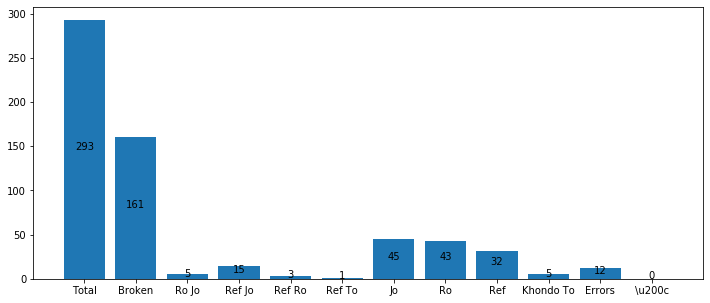

In [16]:
test_grapheme_extract(jukto_list)

In [17]:
word = 'এটাশুধুমাত্রসেনিটিচেকযেনরমালশব্দেঠিকআছেকিনা'
word1 = 'রেফর্রাম্যর্রর্য্যষ্ঠ্রযপড়্রুঢ়পদ্ভাংঠ্য্যঙ্র্যাডৃপটেরন্ঙ'
word2 = "দম্বোন্দ্রগৃন্থগ্নীল্লীর্কঙলীত্যেদ্বসূব্দাকৈর্দ্বি"
word3 = "ব্যবসা-উপযোগী"
word4 = "সংশয়্!"
word5 = "গ্রীক্"
word6 = "সৌক্ষ্ম্য"
word7 = "স্ট্"
word8 = "ল্‌ফ"

extract_graphemes(word8)

['ল', '্', '\u200c', 'ফ']

In [19]:
for i in word4:
    print(i)

স
ং
শ
য
়
্
!


In [31]:
curr_word = "যোগাযোগ"

for i in curr_word:
    print(i)

curr_word = unicodedata.normalize('NFKD', curr_word)

for i in curr_word:
    print(i)

য
ো
গ
া
য
ো
গ
য
ে
া
গ
া
য
ে
া
গ


In [21]:
# initializing string
test_str = ''
  
# printing original String
print("The original string is : " + str(test_str))
  
# using sub() to perform substitutions
# ord() for conversion.
res = (re.sub('.', lambda x: r'\u % 04X' % ord(x.group()), test_str))
  
# printing result 
print("The unicode converted String : " + str(res))

The original string is : 
The unicode converted String : \u  F0D7\u  F0D7\u  F0D7\u  F0D7\u  F0D7\u  F0D7\u  F0D7


In [22]:
curr_word = "জায়গায়ই"
#curr_word = "যোগাযোগ"
#curr_word = 'যোগাযোগ'
print(curr_word)
for i in curr_word:
    print(i)
    
if 'ো' in curr_word:
    curr_word = curr_word.replace('ো', 'ো')
    
if 'ৌ' in word:
    word = word.replace('ৌ', 'ৌ')

if '়' in curr_word:
    new_word = []
    length = len(curr_word)
    for i in range(0, length):
        if curr_word[i] == '়':
            if curr_word[i-1] == 'ব':
                new_word[-1] = 'র'
            elif curr_word[i-1] == 'য':
                new_word[-1] = 'য়'
            elif curr_word[i-1] == 'ড':
                new_word[-1] = 'ড়'
            elif curr_word[i-1] == 'ঢ':
                new_word[-1] = 'ঢ়'
            else:
                new_word.append(curr_word[i])
        else:
            new_word.append(curr_word[i])
            
    curr_word = ''.join([str(i) for i in new_word])
    
print(curr_word)

for i in curr_word:
    print(i)

জায়গায়ই
জ
া
য
়
গ
া
য
়
ই
জায়গায়ই
জ
া
য়
গ
া
য়
ই


In [35]:
def normalize_word(word):

    if 'ো' in word: word = word.replace('ো', 'ো')
    
    if 'ৗ' in word:    
        if 'ৌ' in word: word = word.replace('ৌ', 'ৌ') 
        else: word = word.replace('ৗ', 'ী') # 'ৗ' without 'ে' is replaced by 'ী'
    
    if '়' in word:
        if 'ব়' in word: word = word.replace('ব়', 'র')
        if 'য়' in word: word = word.replace('য়', 'য়')
        if 'ড়' in word: word = word.replace('ড়', 'ড়')
        if 'ঢ়' in word: word = word.replace('ঢ়', 'ঢ়')
        if '়' in word: word = word.replace('়', '') # discard any other '়' without 'ব'/'য'/'ড'/'ঢ'
        
    # visually similar '৷' (Bengali Currency Numerator Four) is replaced by '।' (Devanagari Danda)
    if '৷' in word: word = word.replace('৷', '।')
    
    return word


def preproc_synth_train_data(labels_file):
    grapheme_dict = {}
    labels = []
    words = []
    lengths = []
    count = 2
    
    with open(labels_file, 'r') as file:
        mappings = [line.strip() for line in file]
    
    labels_dict = {filename: label for filename, label in (mapping.split() for mapping in mappings)}
    filenames = sorted(labels_dict.keys(), key=lambda x: int(x.split('.')[0]))

    grapheme_dict[' '] = 1
    
    print("\nPreprocessing synthetic training data:")
    for i, name in tqdm(enumerate(filenames)):
        
        # Get labels from labels dict
        curr_word = labels_dict[name]
        curr_word = normalize_word(curr_word)
        # print(curr_word)
        curr_label = []
        words.append(curr_word)
        
        graphemes = extract_graphemes(curr_word)
        
        for grapheme in graphemes:
            if grapheme not in grapheme_dict:
                grapheme_dict[grapheme] = count
                curr_label.append(count)
                count += 1
            else:
                curr_label.append(grapheme_dict[grapheme])
        lengths.append(len(curr_label))
        labels.append(curr_label)
    

    inv_grapheme_dict = {v: k for k, v in grapheme_dict.items()}
    return inv_grapheme_dict, words, labels, lengths



###################### All Diacritics Seperation ########################
# def extract_graphemes(word):
    
#     forms_cluster = {'ক': ['ক', 'ট', 'ত', 'ন', 'ব', 'ম', 'র', 'ল', 'ষ', 'স'],
#                      'গ': ['গ', 'ধ', 'ন', 'ব', 'ম', 'ল'],
#                      'ঘ': ['ন'],
#                      'ঙ': ['ক', 'খ', 'গ', 'ঘ', 'ম'],
#                      'চ': ['চ', 'ছ', 'ঞ'],
#                      'জ': ['জ', 'ঝ', 'ঞ', 'ব'],
#                      'ঞ': ['চ', 'ছ', 'জ', 'ঝ'],
#                      'ট': ['ট', 'ব'],
#                      'ড': ['ড'],
#                      'ণ': ['ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ব', 'ম'],
#                      'ত': ['ত', 'থ', 'ন', 'ব', 'ম', 'র'],
#                      'থ': ['ব'],
#                      'দ': ['গ', 'ঘ', 'দ', 'ধ', 'ব', 'ভ', 'ম'],
#                      'ধ': ['ন', 'ব'],
#                      'ন': ['জ', 'ট', 'ঠ', 'ড', 'ত', 'থ', 'দ', 'ধ', 'ন', 'ব', 'ম', 'স'],
#                      'প': ['ট', 'ত', 'ন', 'প', 'ল', 'স'],
#                      'ফ': ['ট', 'ল'],
#                      'ব': ['জ', 'দ', 'ধ', 'ব', 'ভ', 'ল'],
#                      'ভ': ['র'],
#                      'ম': ['ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'ল'],
#                      'ল': ['ক', 'গ', 'ট', 'ড', 'প', 'ফ', 'ব', 'ম', 'ল', 'স'],
#                      'শ': ['চ', 'ছ', 'ত', 'ন', 'ব', 'ম', 'ল'],
#                      'ষ': ['ক', 'ট', 'ঠ', 'ণ', 'প', 'ফ', 'ব', 'ম'],
#                      'স': ['ক', 'খ', 'ট', 'ত', 'থ', 'ন', 'প', 'ফ', 'ব', 'ম', 'ল'],
#                      'হ': ['ণ', 'ন', 'ব', 'ম', 'ল'],
#                      'ড়': ['গ']}
    
#     forms_tripple_cluster = {'ক্ষ': ['ণ', 'ম'], 'ঙ্ক': ['ষ'], 'চ্ছ': ['ব'], 'জ্জ': ['ব'],
#                              'ত্ত': ['ব'], 'দ্দ': ['ব'], 'দ্ধ': ['ব'], 'দ্ভ': ['র'],
#                              'ন্ত': ['ব'], 'ন্দ': ['ব'], 'ম্প': ['ল'], 'ম্ভ': ['র'],
#                              'ষ্ক': ['র'], 'স্ক': ['র'], 'স্ত': ['ব', 'র'], 'স্প': ['ল']}
    
#     chars = []
#     i = 0
#     adjust = 0
    
#     while(i < len(word)):
#         if i+1 < len(word) and word[i+1] == '্':
#             if word[i] == 'র':
#                 chars.append('র্')
#                 adjust = 0
#                 i+=2
#             elif i+2 < len(word) and word[i+2] == 'য':
#                 chars.append(word[i-adjust:i+1])
#                 chars.append('্য')
#                 adjust = 0
#                 i+=3
#             elif i+2 < len(word) and word[i+2] == 'র':
#                 # Treat '্র' as a seperate grapheme
#                 chars.append(word[i-adjust:i+1])
#                 chars.append('্র')
#                 # Keep '্র' icluded in the cluster
#                 # chars.append(word[i-adjust:i+3])
#                 if i+3 < len(word) and word[i+3] == '্' and i+4 < len(word) and word[i+4] == 'য':    
#                     chars.append('্য')
#                     i+=5
#                 else:
#                     i+=3
#                 adjust = 0
#             elif i+2 < len(word) and adjust!=0 and word[i-adjust:i+1] in forms_tripple_cluster \
#                 and word[i+2] in forms_tripple_cluster[word[i-adjust:i+1]]:
#                 if i+3 < len(word) and word[i+3] == '্':
#                     adjust += 2
#                     i+=2
#                 else:
#                     chars.append(word[i-adjust:i+3])
#                     adjust = 0
#                     i+=3
#             elif i+2 < len(word) and adjust==0 and word[i] in forms_cluster and word[i+2] in forms_cluster[word[i]]:
#                 if i+3 < len(word) and word[i+3] == '্':
#                     adjust += 2
#                     i+=2
#                 else:
#                     chars.append(word[i-adjust:i+3])
#                     adjust = 0
#                     i+=3
#             else:
#                 chars.append(word[i-adjust:i+1])
#                 chars.append('্')
#                 adjust = 0
#                 i+=2

#         else:
#             chars.append(word[i:i+1])
#             i+=1

    
#     #print(word)
#     #print(chars)

#     return chars



###################### Vowel Diacritics Seperation ########################
def extract_graphemes(word):
    
#     if "ইলেকট" in word:
#         print(word)
    
    forms_cluster = {'ক': ['ক', 'ট', 'ত', 'ন', 'ব', 'ম', 'য', 'র', 'ল', 'ষ', 'স'],
                     'খ': ['য', 'র'],
                     'গ': ['গ', 'ধ', 'ন', 'ব', 'ম', 'য', 'র', 'ল'],
                     'ঘ': ['ন', 'য', 'র'],
                     'ঙ': ['ক', 'খ', 'গ', 'ঘ', 'ম', 'য', 'র'],
                     'চ': ['চ', 'ছ', 'ঞ', 'য', 'র'],
                     'ছ': ['য', 'র'],
                     'জ': ['জ', 'ঝ', 'ঞ', 'ব', 'য', 'র'],
                     'ঝ': ['য', 'র'],
                     'ঞ': ['চ', 'ছ', 'জ', 'ঝ', 'য', 'র'],
                     'ট': ['ট', 'ব', 'য', 'র'],
                     'ঠ': ['য', 'র'],
                     'ড': ['ড', 'য', 'র'],
                     'ঢ': ['য', 'র'],
                     'ণ': ['ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ব', 'ম', 'য', 'র'],
                     'ত': ['ত', 'থ', 'ন', 'ব', 'ম', 'য', 'র'],
                     'থ': ['ব', 'য', 'র'],
                     'দ': ['গ', 'ঘ', 'দ', 'ধ', 'ব', 'ভ', 'ম', 'য', 'র'],
                     'ধ': ['ন', 'ব', 'য', 'র'],
                     'ন': ['জ', 'ট', 'ঠ', 'ড', 'ত', 'থ', 'দ', 'ধ', 'ন', 'ব', 'ম', 'য', 'র', 'স'],
                     'প': ['ট', 'ত', 'ন', 'প', 'ল', 'য', 'র', 'স'],
                     'ফ': ['ট', 'য', 'র', 'ল'],
                     'ব': ['জ', 'দ', 'ধ', 'ব', 'ভ', 'য', 'র', 'ল'],
                     'ভ': ['য', 'র'],
                     'ম': ['ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল'],
                     'য': ['য', 'র'],
#                      'র': ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ',
#                            'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়'],
                     'ল': ['ক', 'গ', 'ট', 'ড', 'প', 'ফ', 'ব', 'ম', 'য', 'র', 'ল', 'স'],
                     'শ': ['চ', 'ছ', 'ত', 'ন', 'ব', 'ম', 'য', 'র', 'ল'],
                     'ষ': ['ক', 'ট', 'ঠ', 'ণ', 'প', 'ফ', 'ব', 'ম', 'য', 'র'],
                     'স': ['ক', 'খ', 'ট', 'ত', 'থ', 'ন', 'প', 'ফ', 'ব', 'ম', 'য', 'র', 'ল'],
                     'হ': ['ণ', 'ন', 'ব', 'ম', 'য', 'র', 'ল'],
                     'ড়': ['গ', 'য', 'র'],
                     'ঢ়': ['য', 'র'],
                     'য়': ['য', 'র']}
    
    forms_tripple_cluster = {'ক্ষ': ['ণ', 'ম'], 'ঙ্ক': ['ষ'], 'চ্ছ': ['ব'], 'জ্জ': ['ব'],
                             'ত্ত': ['ব'], 'দ্দ': ['ব'], 'দ্ধ': ['ব'], 'দ্ভ': ['র'],
                             'ন্ত': ['ব'], 'ন্দ': ['ব'], 'ম্প': ['ল'], 'ম্ভ': ['র'],
#                              'র্': ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ',
#                                    'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়'],
                             'ষ্ক': ['র'], 'স্ক': ['র'], 'স্ত': ['ব', 'র'], 'স্প': ['ল']}
    
    chars = []
    i = 0
    adjust = 0
    ref = False
    
    while(i < len(word)):
        if i+1 < len(word) and word[i+1] == '্':
            if word[i] == 'র':
#                 if adjust != 0:
#                     chars.append(word[i-adjust:i-1])
#                     chars.append('্')
                #chars.append('র্')
                #adjust = 2
                ref = True
                i+=2
#             if i+2 < len(word) and word[i+2] == 'য':
#                 # chars.append(word[i-adjust:i+1])
#                 # chars.append('্য')
#                 chars.append(word[i-adjust:i+3])
#                 adjust = 0
#                 i+=3
#             elif i+2 < len(word) and word[i+2] == 'র':
#                 # Treat '্র' as a seperate grapheme
#                 # chars.append(word[i-adjust:i+1])
#                 # chars.append('্র')
#                 # Keep '্র' icluded in the cluster
#                 # chars.append(word[i-adjust:i+3])
#                 if len(chars) > 0 and len(chars[-1]) == 1:
#                     chars.append(word[i-adjust:i+1])
#                     chars.append('্র')
#                 else:
#                     chars.append(word[i-adjust:i+3])
#                 if i+3 < len(word) and word[i+3] == '্' and i+4 < len(word) and word[i+4] == 'য':    
#                     # chars.append('্য')
#                     chars.append(word[i-adjust:i+5])
#                     i+=5
#                 else:
#                     if len(chars) > 0 and len(chars[-1]) == 1:
#                         chars.append(word[i-adjust:i+1])
#                         chars.append('্র')
#                     else:
#                         chars.append(word[i-adjust:i+3])
#                     i+=3                    
#                 adjust = 0
            elif i+2 < len(word) and adjust!=0 and word[i-adjust:i+1] in forms_tripple_cluster \
                and word[i+2] in forms_tripple_cluster[word[i-adjust:i+1]]:
                if i+3 < len(word) and word[i+3] == '্':
                    adjust += 2
                    i+=2
                else:
                    if ref:
                        adjust += 2
                        ref = False
                    chars.append(word[i-adjust:i+3])
                    adjust = 0
                    i+=3
#             elif i+2 < len(word) and (adjust==0 or word[i-2] == 'র') and word[i] in forms_cluster and word[i+2] in forms_cluster[word[i]]:
            elif i+2 < len(word) and adjust==0 and word[i] in forms_cluster and word[i+2] in forms_cluster[word[i]]:
                if i+3 < len(word) and word[i+3] == '্':
                    adjust += 2
                    i+=2
                else:
                    if ref:
                        adjust += 2
                        ref = False
                    chars.append(word[i-adjust:i+3])
                    adjust = 0
                    i+=3        
#             elif i+2 < len(word) and word[i+2] == 'র':
#                 # Treat '্র' as a seperate grapheme
#                 chars.append(word[i-adjust:i+1])
#                 chars.append('্র')
#                 # Keep '্র' icluded in the cluster
#                 # chars.append(word[i-adjust:i+3])
#                 if i+3 < len(word) and word[i+3] == '্' and i+4 < len(word) and word[i+4] == 'য':    
#                     chars.append('্য')
#                     i+=5
#                 else:
#                     i+=3
#                 adjust = 0
            else:
                if ref:
                    adjust += 2
                    ref = False
                chars.append(word[i-adjust:i+1])
                chars.append('্')
                adjust = 0
                i+=2

#         else:
#             if adjust!=0 and word[i-adjust:i] == 'র্':
#                 chars.append(word[i-adjust:i+1])
#                 adjust = 0
#                 i+=1
#             elif adjust!=0:
#                  print(word[i])
#                  break
        else:
            if ref:
                chars.append(word[i-2:i+1])
                ref = False
            else:
                chars.append(word[i:i+1])
            i+=1

            

    
    #print(word)
    #print(chars)

    return chars



###################### Naive character representation ########################
# def extract_graphemes(word):
    
#     return list(word)


In [36]:
inv_grapheme_dict, _, _, _ = preproc_synth_train_data(os.path.join(DATA_DIR, "synthetic_ocr/train_labels.txt"))
print(len(inv_grapheme_dict))

2431it [00:00, 24309.39it/s]


Preprocessing synthetic training data:


2086707it [00:22, 92128.04it/s] 


685


In [37]:
print(inv_grapheme_dict)

{1: ' ', 2: 'ক', 3: 'ম', 4: 'র', 5: 'ে', 6: 'ত', 7: 'া', 8: 'স', 9: 'ন', 10: 'ি', 11: 'য়', 12: 'ফ্ল', 13: 'শ', 14: 'গ', 15: 'ু', 16: 'প', 17: 'ী', 18: 'ক্ষ', 19: '(', 20: 'উ', 21: 'ত্ত', 22: ',', 23: 'হ', 24: 'স্য', 25: 'ঘ', 26: 'ণ', 27: 'ম্য', 28: 'জ', 29: 'ন্ট', 30: ')', 31: 'জ্জ', 32: 'ব', 33: 'ং', 34: 'ল', 35: 'দ', 36: '-', 37: 'ভ', 38: 'ো', 39: 'ট', 40: 'ত্র', 41: 'অ', 42: 'ূ', 43: 'র্ব', 44: 'ন্দ্র', 45: 'ও', 46: '১', 47: '৮', 48: '*', 49: 'ঝ', 50: 'ড়', 51: '২', 52: '৪', 53: 'ই', 54: 'আ', 55: '।', 56: "'", 57: 'র্য', 58: 'ড', 59: 'স্ক', 60: 'র্দ', 61: 'খ', 62: 'ফ', 63: 'ভ্য', 64: '?', 65: 'থ্য', 66: 'ষ্ট্র', 67: 'ৌ', 68: 'চ', 69: 'য', 70: 'ন্ত্র', 71: 'ন্ড', 72: 'ঁ', 73: 'ক্র', 74: '!', 75: 'ৃ', 76: 'ম্প', 77: 'অ্য', 78: '৯', 79: '০', 80: 'এ', 81: 'ছ', 82: 'ন্দ', 83: '"', 84: '৭', 85: '৫', 86: 'থ', 87: 'র্জ', 88: 'ব্য', 89: 'জ্য', 90: 'ট্র', 91: 'ন্স', 92: 'ব্র', 93: 'র্ট', 94: '৬', 95: 'ঙ', 96: 'প্ট', 97: 'র্ল', 98: 'দ্য', 99: 'ৈ', 100: 'ষ্ঠ', 101: 'ক্ষ্ণ', 102: 'দ্ধ', 103: 'ন্ন

In [97]:
grapheme_dict = {v: k for k, v in inv_grapheme_dict.items()}
print('র্' in grapheme_dict)

False


In [31]:
word = 'এটাশুধুমাত্রসেনিটিচেকযেনরমালশব্দেঠিকআছেকিনা'
word1 = 'রেফর্রাম্যর্রর্য্যষ্ঠ্রযপড়্রুঢ়পদ্ভাংঠ্য্যঙ্র্যাডৃপটেরন্ঙ'
word2 = "দম্বোন্দ্রগৃন্থগ্নীল্লীর্কঙলীত্যেদ্বসূব্দাকৈর্দ্বি"
word3 = "ব্যবসা-উপযোগী"
word4 = "সংশয়্!"
word5 = "গ্রীক্"
word6 = "সৌক্ষ্ম্য"
word7 = "স্ট্"
word8 = "ঝিগ-শাগ-পা-ত্শে-ব্র্তান-র্দো-র্জে।"
word9 = "ব্র্ত"

print(extract_graphemes(normalize_word(word8)))

['ঝ', 'ি', 'গ', '-', 'শ', 'া', 'গ', '-', 'প', 'া', '-', 'ত', '্', 'শ', 'ে', '-', 'ব্র্ত', '্', 'ন', '-', 'র্দ', '্', '-', 'র্জ', '্', '।']


In [ ]:
'\x8f', '\x9d', '\u200b', '\u200c', '\u200d', '\u200f', '\u09e4', '\u09e5', '\uf020', '\uf02d', '\uf06c', '\uf0ab', '\uf0b4', '\uf06f', '\uf0be', '\uf070', '\uf071', '\uf029', '\uf06e', '\uf05c', '\uf028', '\uf061', '\uf062', '\uf02b', '\uf03d', '\uf0fa', '\uf044', '\uf02e', '\uf03a', '\uf046', '\uf0ce', '\uf041', '\uf031', '\uf04f', '\uf048', '\uf033', '\uf04e', '\uf0ae', '\uf06d', '\uf03e', '\uf0d7'

In [20]:
for c in 'ব্ভ':
    print(c)

ব
্
ভ
